In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_excel(r"C:\Users\Tsega\Uber-Review-Python-Analysis\Uberreview.xls")
df

,Name,Date,Country,Subject,Review
0,Julie Gemmell,"Date of experience: June 21, 2023",Portugal,Our driver forgot to click end tripâ€¦,Our driver forgot to click end trip when we ex...
1,Hayley Bugler,"Date of experience: June 27, 2023",United Kingdom,Very disappointed in Uber todayâ€¦,Very disappointed in Uber today requested a pi...
2,David Taylor,"Date of experience: December 03, 2022",Australia,Banned from Uber as a result ofâ€¦,Banned from Uber as a result of mistaken ident...
3,joyce,"Date of experience: June 20, 2023",Iceland,My Uber was in a terrifying accident onâ€¦,My Uber was in a terrifying accident on a high...
4,Graham Trembath,"Date of experience: June 25, 2023",United Kingdom,Uber Useless,Uber Useless: Uber has hit the depths for cust...
...,...,...,...,...,...
1891,juan Carlos Navarrete,"Date of experience: August 01, 2022",Mexico,The Ubers never show up,"The Ubers never show up, you guys charge multi..."
1892,Isabelle Whiteman,"Date of experience: September 03, 2022",United Kingdom,Go with Virgin instead.,"Recently joined Vodafone Fibre and here I am, ..."
1893,Shannon,"Date of experience: August 01, 2022",United Kingdom,Â£3.99 Delivery charge on top ofâ€¦,Â£3.99 Delivery charge on top of additional fe...
1894,Janet Ingman,"Date of experience: September 25, 2022",United Kingdom,My son (Jack Ingman) just got deductedâ€¦,My son (Jack Ingman) just got deducted a payme...


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1896 entries, 0 to 1895
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Name     1896 non-null   object
 1   Date     1896 non-null   object
 2   Country  1896 non-null   object
 3   Subject  1896 non-null   object
 4   Review   1896 non-null   object
dtypes: object(5)
memory usage: 74.2+ KB


In [4]:
# Remove the "Date of experience:" text with the Date column

df['Date'] = df['Date'].str.replace('Date of experience: ', '')

df

,Name,Date,Country,Subject,Review
0,Julie Gemmell,"June 21, 2023",Portugal,Our driver forgot to click end tripâ€¦,Our driver forgot to click end trip when we ex...
1,Hayley Bugler,"June 27, 2023",United Kingdom,Very disappointed in Uber todayâ€¦,Very disappointed in Uber today requested a pi...
2,David Taylor,"December 03, 2022",Australia,Banned from Uber as a result ofâ€¦,Banned from Uber as a result of mistaken ident...
3,joyce,"June 20, 2023",Iceland,My Uber was in a terrifying accident onâ€¦,My Uber was in a terrifying accident on a high...
4,Graham Trembath,"June 25, 2023",United Kingdom,Uber Useless,Uber Useless: Uber has hit the depths for cust...
...,...,...,...,...,...
1891,juan Carlos Navarrete,"August 01, 2022",Mexico,The Ubers never show up,"The Ubers never show up, you guys charge multi..."
1892,Isabelle Whiteman,"September 03, 2022",United Kingdom,Go with Virgin instead.,"Recently joined Vodafone Fibre and here I am, ..."
1893,Shannon,"August 01, 2022",United Kingdom,Â£3.99 Delivery charge on top ofâ€¦,Â£3.99 Delivery charge on top of additional fe...
1894,Janet Ingman,"September 25, 2022",United Kingdom,My son (Jack Ingman) just got deductedâ€¦,My son (Jack Ingman) just got deducted a payme...


In [5]:
# assigned the right datatype to each column

df['Country'] = df['Country'].astype(str)
df['Name'] = df['Name'].astype(str)
df['Review'] = df['Review'].astype(str)
df['Date'] = pd.to_datetime(df['Date'])

In [6]:
# dropped duplicates round the df

df.drop_duplicates(inplace=True)

In [7]:
# I used the counter class from the collections module to find the most used words within the Review colum
from collections import Counter

# Combine all the text from the 'Revieww' column into a single string
text = ' '.join(df.Review)

# Split the text into individual words
words = text.split()

# Count the frequency of each word
word_counts = Counter(words)

# Get the most common words and their frequencies
most_common_words = word_counts.most_common(150)

for word, count in most_common_words:
    if len(word) > 6:
        print(word, count)

service 464
customer 431
charged 334
because 303
company 289
drivers 285
account 262
minutes 180
another 171
support 166
cancelled 156
waiting 140
without 136
contact 136


In [8]:
# Categorizing reviews based on common keywords
# Each keyword category represents a specific aspect of the reviews

def review_category(x):
    categories = {
        # Keywords related to support and customer service
        'Bad Support': ['support', 'customer service', 'communication', 'on hold', 'ignoring calls', 'unavailable', 'complaint'],
        # Keywords related to fares and pricing
        'High Fares': ['overcharge', 'thief', 'quoted', 'additional', 'cost', 'fare', 'monthly', 'took my', 'expensive', 'fraudulent', 'charged', 'charges', 'charge', 'amount', 'charging', 'twice', 'insane', 'over charge', 'cheating', 'price', 'payment', 'account', 'refund', 'refunded', 'multiple'],
        # Keywords related to cancellations
        'Cancellation Fee': ['cancellation fee', 'cancellation', 'cancelatrion fee'],
        # Keywords related to driver-related issues
        'Driver Cancellation': ['driver cancel', 'driver cancelled', 'cancelled', 'cancel the', 'cancel', 'booked'],
        # Keywords related to driver behavior and professionalism
        'Bad Drivers': ['rude', 'insult', 'abuse', 'bad driver', 'threatened', 'threat', 'abusive', 'dog', 'respect', 'professional', 'helpful', "don't help", 'drivers', 'driver'],
        # Keywords related to delays and late arrivals
        'Late Arrival': ['late', 'on time', 'waiting', 'show up', 'waited', 'showed up', 'minutes', 'wait'],
        # Keywords related to address and location issues
        'Wrong Pick-up/drop': ['address', 'location', 'dropped'],
        # Keywords related to delivery issues
        'Delivery Issues': ['deliver', 'delivered', 'delivering', 'McDonalds', 'uber eat', 'walmart', 'received'],
        # Keywords related to unpaid or underpaid drivers
        'Underpaid': ['pennies', 'penny', 'working', 'pay'],
        # Keywords related to overall service experience
        'Bad Service' : ['available', 'app', 'bad service', 'disappointed', 'worst service', 'garbage', 'business', 'terrible', 'terrible service', 'poor service', 'experience', 'bad experience', 'no driver', 'no ride', 'no drivers', ' not recommend', 'recommend', 'service', 'company', 'customer']
    }

    for category, values in categories.items():
        if any(word in x.lower() for word in values):
            return category
    return x

# Categorize reviews based on keywords and replace the 'Review' column
df['Review'] = df['Review'].apply(review_category)
df

,Name,Date,Country,Subject,Review
0,Julie Gemmell,2023-06-21,Portugal,Our driver forgot to click end tripâ€¦,High Fares
1,Hayley Bugler,2023-06-27,United Kingdom,Very disappointed in Uber todayâ€¦,High Fares
2,David Taylor,2022-12-03,Australia,Banned from Uber as a result ofâ€¦,High Fares
3,joyce,2023-06-20,Iceland,My Uber was in a terrifying accident onâ€¦,High Fares
4,Graham Trembath,2023-06-25,United Kingdom,Uber Useless,High Fares
...,...,...,...,...,...
1891,juan Carlos Navarrete,2022-08-01,Mexico,The Ubers never show up,High Fares
1892,Isabelle Whiteman,2022-09-03,United Kingdom,Go with Virgin instead.,High Fares
1893,Shannon,2022-08-01,United Kingdom,Â£3.99 Delivery charge on top ofâ€¦,Bad Support
1894,Janet Ingman,2022-09-25,United Kingdom,My son (Jack Ingman) just got deductedâ€¦,High Fares


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1872 entries, 0 to 1895
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Name     1872 non-null   object        
 1   Date     1872 non-null   datetime64[ns]
 2   Country  1872 non-null   object        
 3   Subject  1872 non-null   object        
 4   Review   1872 non-null   object        
dtypes: datetime64[ns](1), object(4)
memory usage: 87.8+ KB


In [10]:
# Calculate the percentage of reviews in each category
percentages = round(df['Review'].value_counts()/df['Review'].count() * 100)

percentages

Review
High Fares             41.0
Bad Support            25.0
Bad Drivers            12.0
Driver Cancellation     8.0
Bad Service             7.0
Late Arrival            3.0
Delivery Issues         2.0
Underpaid               1.0
Wrong Pick-up/drop      1.0
Cancellation Fee        1.0
Name: count, dtype: float64

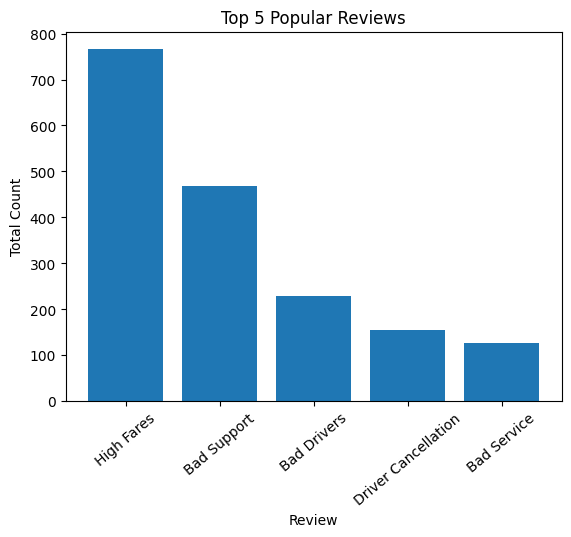

In [11]:
x = df['Review'].value_counts().nlargest(5).index
y = df['Review'].value_counts().nlargest(5).values

plt.bar(x, y)

plt.title('Top 5 Popular Reviews')
plt.xlabel('Review')
plt.ylabel('Total Count')

plt.xticks(rotation=40)  # Rotate the x-axis labels by 45 degrees
plt.show()
